# **Masfudin Dwi Cahyo**

### **masfudindc@gmail.com**



---



# **Submission Dicoding**

## **Proyek Akhir : Klasifikasi Gambar**


---



# **Import Library**

In [1]:
# Install library tensorflow
!pip install tensorflow

In [58]:
# Import library yang diperlukan
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import cv2

# **Load Data**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [59]:
# Load data bertipe zip dengan library zipfile
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Dicoding/rockpaperscissors.zip', 'r') as zip:
  zip.extractall('/content/drive/MyDrive/Dicoding/rockpaperscissors')

# Menentukan path dataset
base_dir = '/content/drive/MyDrive/Dicoding/rockpaperscissors/rps-cv-images/'

# **Preprocessing**

In [60]:
# Menginisialisasi ImageDataGenerator untuk augmentasi gambar
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4  # Melakukan split data menjadi train dan validation dengan skala 60:40
)

# **Split Data**

In [6]:
# Persiapan data train
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Persiapan data validation
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **Membuat Model**

In [61]:
# Menginisialisasi model sequential (CNN)
model = Sequential()

# Menambahkan layer-layer ke dalam model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# **Latih Model**

In [62]:
# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // validation_generator.batch_size
)

Epoch 1/10
41/41 [==============================] - 146s 4s/step - loss: 1.1119 - accuracy: 0.4649 - val_loss: 0.9701 - val_accuracy: 0.5567
Epoch 2/10
41/41 [==============================] - 142s 3s/step - loss: 0.7686 - accuracy: 0.6708 - val_loss: 0.6236 - val_accuracy: 0.7407
Epoch 3/10
41/41 [==============================] - 142s 3s/step - loss: 0.5414 - accuracy: 0.7933 - val_loss: 0.5506 - val_accuracy: 0.7558
Epoch 4/10
41/41 [==============================] - 145s 4s/step - loss: 0.5247 - accuracy: 0.7941 - val_loss: 0.5893 - val_accuracy: 0.7836
Epoch 5/10
41/41 [==============================] - 140s 3s/step - loss: 0.4021 - accuracy: 0.8385 - val_loss: 0.8033 - val_accuracy: 0.7025
Epoch 6/10
41/41 [==============================] - 147s 4s/step - loss: 0.4593 - accuracy: 0.8300 - val_loss: 0.4103 - val_accuracy: 0.8495
Epoch 7/10
41/41 [==============================] - 135s 3s/step - loss: 0.3657 - accuracy: 0.8627 - val_loss: 0.3642 - val_accuracy: 0.8773
Epoch 8/10
41

# **Menyimpan model**

In [10]:
# Setelah melatih model
model.save('/content/drive/MyDrive/Dicoding/rockpaperscissors/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Uji Model: Memprediksi Gambar yang Diunggah**

Saving 2M8LvUBGMOH1bsaz.png to 2M8LvUBGMOH1bsaz.png
1/1 [==============================] - 0s 45ms/step


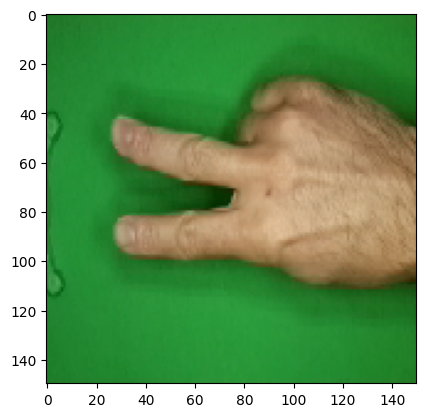

2M8LvUBGMOH1bsaz.png
paper


In [57]:
# Melakukan prediksi terhadap gambar yang di-upload

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    plt.imshow(img)
    plt.show()

    print(fn)
    if classes[0][0] == 1:
        print('paper')
    elif classes[0][1] == 1:
        print('rock')
    else:
        print('scissors')


# **Uji Model: Memprediksi melalui webcam**

In [47]:
# Load model yang telah dilatih
model = load_model('/content/drive/MyDrive/Dicoding/rockpaperscissors/model.h5')

# Fungsi untuk memprediksi kelas dari frame video
def predict_class(frame):
    img = cv2.resize(frame, (150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.0
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    return class_index

<IPython.core.display.Javascript object>

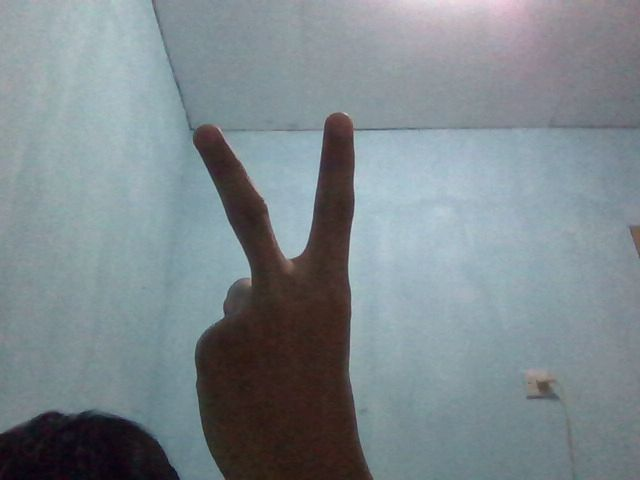

Captured photo saved as /content/drive/MyDrive/Dicoding/photo1.jpg


In [48]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ video: true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getVideoTracks()[0].stop();
            div.remove();
            return canvas.toDataURL('image/jpeg', quality);
        }
        ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)

    # Menampilkan hasil foto webcam
    display(Image(filename=filename))
    print(f'Captured photo saved as {filename}')

    return {'filename': filename, 'binary': binary}

# Memanggil fungsi untuk mengambil foto
photo = take_photo('/content/drive/MyDrive/Dicoding/photo1.jpg')



1/1 [==============================] - 0s 136ms/step


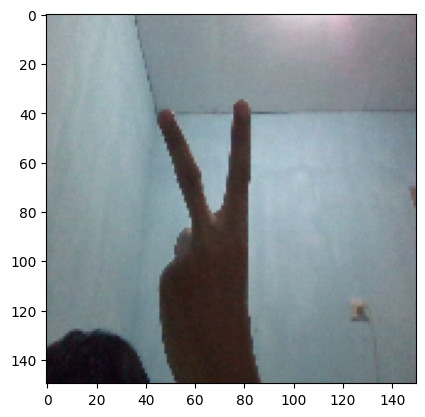

filename
paper


In [49]:
# uploaded = photo

# # if uploaded:
# for fn in uploaded.keys():
path = '/content/drive/MyDrive/Dicoding/photo1.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)

plt.imshow(img)
plt.show()

print(fn)
if classes[0][0] == 1:
    print('paper')
elif classes[0][1] == 1:
    print('rock')
else:
    print('scissors')
# else:
#     print("No photo uploaded.")

In [17]:
# Install library TensorFlow.js di Colab
!pip install tensorflowjs

# Convert model Keras ke format TensorFlow.js
!tensorflowjs_converter --input_format keras /content/drive/MyDrive/Dicoding/rockpaperscissors/model.h5 /content/drive/MyDrive/Dicoding/rockpaperscissors/tfjs_model

2023-11-25 22:18:29.868408: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 22:18:29.868484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 22:18:29.869994: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-25 22:18:31.126598: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [20]:
# Load model TensorFlow.js
model = load_model('/content/model.json')

# Praproses gambar dan lakukan prediksi
from PIL import Image

image_path = 'photo.jpg'
img = Image.open(image_path).resize((224, 224))
img_array = np.array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
class_index = np.argmax(prediction)

# Tampilkan hasil prediksi
print(f'Predicted class index: {class_index}')

OSError: ignored